# Data Science Capstone 2
## Weather Forecaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the datasets
weather_dataset = pd.read_csv("raw_data/weather_prediction_dataset.csv")

#This dataset is optional and provides a template showing all the times the weather is appropriate for a picnic
weather_for_picnic = pd.read_csv("raw_data/weather_prediction_bbq_labels.csv")

In [3]:
#Initial details of the dataset
print("Shape of dataset:", weather_dataset.shape)
weather_dataset.head()

Shape of dataset: (3654, 165)


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
weather_dataset.tail()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9
3653,20100101,1,8,0.93,0.9965,0.08,0.56,0.0,2.9,-0.2,...,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.5,-0.7,1.8


In [5]:
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [6]:
weather_dataset.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [7]:
city_names = ["BASEL", "BUDAPEST", "DE_BILT", "DRESDEN", "DUSSELDORF", "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT",
              "MALMO", "MONTELIMAR", "MUENCHEN", "OSLO", "PERPIGNAN", "ROMA", "SONNBLICK", "STOCKHOLM", "TOURS"]

In [8]:
# Create a for loop to construct a list of sub dataframes, each specific to a city
dataframes = {}
for city in city_names:
    pattern = f'DATE|MONTH|{city}'
    mask = weather_dataset.columns.str.contains(pattern, regex=True)
    sub_df = weather_dataset.loc[:, mask]
    dataframes[city] = sub_df

In [9]:
# Check for any missing values
list(weather_dataset.isnull().count())

[3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,
 3654,

Below the next portion of code cells will display the general details of each city specific dataframe.

### Basel

In [10]:
df_basel = dataframes['BASEL']
print("Shape of Basel dataset:", df_basel.shape)
df_basel

Shape of Basel dataset: (3654, 11)


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9


### Budapest

In [11]:
df_budapest = dataframes['BUDAPEST']
print("Shape of Budapest dataset:", df_budapest.shape)
df_budapest

Shape of Budapest dataset: (3654, 10)


,DATE,MONTH,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
0,20000101,1,3,0.92,1.0268,0.52,0.00,3.7,-4.9,-0.7
1,20000102,1,8,0.94,1.0297,0.14,0.00,0.4,-3.6,-1.9
2,20000103,1,6,0.95,1.0295,0.19,0.00,0.0,-0.8,1.1
3,20000104,1,8,0.94,1.0252,0.21,0.00,0.0,-1.0,0.1
4,20000105,1,5,0.88,1.0235,0.43,0.00,0.8,0.2,3.9
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,1,0.61,1.0072,0.65,0.00,6.1,3.5,7.0
3650,20091229,12,3,0.59,1.0113,0.68,0.32,6.7,3.2,6.9
3651,20091230,12,8,0.93,1.0040,0.18,0.12,0.0,1.8,3.5
3652,20091231,12,6,0.90,0.9984,0.30,0.69,0.6,4.7,7.4


### De Bilt

In [12]:
df_de_bilt = dataframes['DE_BILT']
print("Shape of De Bilt dataset:", df_de_bilt.shape)
df_de_bilt

Shape of De Bilt dataset: (3654, 13)


,DATE,MONTH,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max
0,20000101,1,7,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1
1,20000102,1,8,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7
2,20000103,1,8,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6
3,20000104,1,7,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4
4,20000105,1,3,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,2.3,7.0,0.87,1.0044,0.40,0.00,5.2,2.6,-2.5,7.3
3650,20091229,12,6,4.3,9.0,0.91,0.9992,0.15,0.55,0.4,0.6,-1.4,1.7
3651,20091230,12,8,4.1,9.0,0.94,0.9939,0.11,0.17,0.0,0.3,-0.3,0.9
3652,20091231,12,8,4.9,11.0,0.86,0.9971,0.11,0.00,0.0,0.0,-0.5,0.5


### Dresden

In [13]:
df_dresden = dataframes['DRESDEN']
print("Shape of Dresden dataset:", df_dresden.shape)
df_dresden

Shape of Dresden dataset: (3654, 12)


,DATE,MONTH,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max
0,20000101,1,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0
1,20000102,1,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0
2,20000103,1,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1
3,20000104,1,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2
4,20000105,1,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,6,5.4,13.0,0.83,0.21,0.00,0.0,2.1,0.0,3.9
3650,20091229,12,6,4.0,13.0,0.80,0.44,0.31,6.2,0.2,-2.7,2.6
3651,20091230,12,8,2.6,9.4,0.95,0.12,0.89,0.0,1.6,0.2,3.7
3652,20091231,12,8,2.6,5.8,0.97,0.07,0.24,0.0,-0.2,-1.0,1.9


### Dusseldorf

In [14]:
df_dusseldorf = dataframes['DUSSELDORF']
print("Shape of Dusseldorf dataset:", df_dusseldorf.shape)
df_dusseldorf

Shape of Dusseldorf dataset: (3654, 13)


,DATE,MONTH,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,20000101,1,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9
1,20000102,1,6,3.0,7.4,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9
2,20000103,1,7,5.5,14.3,0.78,1.0235,0.12,0.28,0.0,7.7,6.9,9.1
3,20000104,1,7,6.0,16.8,0.87,1.0162,0.12,0.97,0.0,7.8,6.6,9.2
4,20000105,1,4,4.5,11.2,0.80,1.0203,0.51,0.00,6.5,5.2,0.4,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,3.7,11.5,0.91,1.0050,0.11,0.04,0.0,3.4,0.4,4.7
3650,20091229,12,6,3.0,9.8,0.88,0.9998,0.16,1.57,0.4,2.2,-0.9,4.0
3651,20091230,12,8,2.2,6.5,0.99,0.9925,0.11,0.90,0.0,4.8,1.3,9.4
3652,20091231,12,8,3.1,6.3,0.97,0.9949,0.11,0.04,0.0,0.6,-0.8,1.4


### Heathrow

In [15]:
df_heathrow = dataframes['HEATHROW']
print("Shape of Heathrow dataset:", df_heathrow.shape)
df_heathrow

Shape of Heathrow dataset: (3654, 11)


,DATE,MONTH,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,20000101,1,7,0.94,1.0245,0.18,0.00,0.4,7.0,4.9,10.8
1,20000102,1,7,0.89,1.0253,0.20,0.02,0.7,7.9,5.0,11.5
2,20000103,1,8,0.91,1.0186,0.13,0.60,0.0,9.4,7.2,9.5
3,20000104,1,5,0.89,1.0148,0.34,0.02,2.9,7.0,4.4,11.0
4,20000105,1,5,0.85,1.0142,0.25,0.08,1.3,6.4,1.9,10.8
...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,2,0.90,1.0043,0.37,0.06,3.7,1.7,-2.2,5.0
3650,20091229,12,8,0.92,0.9949,0.12,1.28,0.0,1.9,-1.2,5.2
3651,20091230,12,8,0.97,0.9923,0.12,0.36,0.0,4.6,4.0,4.4
3652,20091231,12,7,0.83,0.9993,0.13,0.00,0.0,3.9,3.3,3.6


### Kassel

In [16]:
df_kassel = dataframes['KASSEL']
print("Shape of Kassel dataset:", df_kassel.shape)
df_kassel

Shape of Kassel dataset: (3654, 12)


,DATE,MONTH,KASSEL_wind_speed,KASSEL_wind_gust,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max
0,20000101,1,2.5,8.2,0.93,1.0237,0.06,0.13,0.0,3.5,1.5,5.0
1,20000102,1,2.9,9.6,0.92,1.0290,0.33,0.00,2.9,2.3,0.3,4.7
2,20000103,1,4.8,11.9,0.90,1.0251,0.20,0.01,0.0,3.5,2.2,4.6
3,20000104,1,4.5,12.7,0.94,1.0174,0.06,0.44,0.0,4.8,3.5,5.6
4,20000105,1,2.4,8.8,0.84,1.0210,0.48,0.00,6.7,2.3,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,2.0,7.9,0.93,1.0050,0.24,0.04,1.1,1.5,-0.5,3.9
3650,20091229,12,0.9,3.5,0.97,1.0034,0.33,1.25,2.6,-1.0,-4.3,1.6
3651,20091230,12,2.1,7.1,0.99,0.9936,0.19,0.80,0.4,2.9,0.0,5.6
3652,20091231,12,2.5,6.9,0.98,0.9946,0.12,0.85,0.0,0.2,-1.8,1.9


### Ljubljana

In [17]:
df_ljubljana = dataframes['LJUBLJANA']
print("Shape of Ljubljana dataset:", df_ljubljana.shape)
df_ljubljana

Shape of Ljubljana dataset: (3654, 12)


,DATE,MONTH,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max
0,20000101,1,6,0.4,0.83,1.0294,0.57,0.00,5.2,-4.8,-9.1,-1.3
1,20000102,1,6,0.4,0.76,1.0310,0.59,0.00,5.0,-0.9,-4.9,2.0
2,20000103,1,6,0.3,0.83,1.0309,0.51,0.00,2.4,-0.3,-1.8,3.3
3,20000104,1,2,0.4,0.88,1.0262,0.70,0.00,3.5,-3.6,-6.1,0.4
4,20000105,1,4,0.6,0.85,1.0271,0.57,0.00,4.6,-3.0,-6.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.9,0.96,1.0100,0.40,0.00,0.9,0.5,-1.5,2.6
3650,20091229,12,8,0.6,0.93,1.0108,0.18,0.02,0.0,2.1,-0.4,3.0
3651,20091230,12,8,0.9,0.91,1.0020,0.11,0.75,0.0,5.9,2.7,7.3
3652,20091231,12,6,0.8,0.95,0.9976,0.12,1.38,0.0,7.8,6.8,9.0


### Maastricht

In [18]:
df_maastricht = dataframes['MAASTRICHT']
print("Shape of Masstricht dataset:", df_maastricht.shape)
df_maastricht

Shape of Masstricht dataset: (3654, 13)


,DATE,MONTH,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,20000101,1,8,3.1,7.0,0.98,1.0251,0.06,0.17,0.0,5.6,4.1,6.9
1,20000102,1,7,3.8,9.0,0.95,1.0286,0.14,0.00,0.0,6.2,4.2,7.5
2,20000103,1,7,7.4,14.0,0.87,1.0236,0.15,0.02,0.9,6.8,6.1,7.9
3,20000104,1,8,7.2,15.0,0.92,1.0165,0.07,1.33,0.0,7.3,6.1,9.0
4,20000105,1,4,4.1,10.0,0.87,1.0205,0.44,0.00,6.2,5.2,0.6,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,4.0,11.0,0.89,1.0053,0.10,0.02,0.0,2.6,-0.5,4.1
3650,20091229,12,6,3.6,8.0,0.92,0.9976,0.11,1.07,0.0,1.7,-1.0,8.4
3651,20091230,12,8,4.2,9.0,0.94,0.9925,0.10,0.63,0.0,6.8,1.2,10.1
3652,20091231,12,8,3.3,7.0,0.98,0.9948,0.03,0.16,0.0,0.0,-1.1,1.3


### Malmo

In [19]:
df_malmo = dataframes['MALMO']
print("Shape of Malmo dataset:", df_malmo.shape)
df_malmo

Shape of Malmo dataset: (3654, 7)


,DATE,MONTH,MALMO_wind_speed,MALMO_precipitation,MALMO_temp_mean,MALMO_temp_min,MALMO_temp_max
0,20000101,1,2.5,0.27,2.9,0.9,3.6
1,20000102,1,3.8,0.00,3.7,1.0,5.4
2,20000103,1,4.3,0.06,5.6,4.0,6.9
3,20000104,1,3.9,0.75,4.5,3.0,6.4
4,20000105,1,3.2,0.03,3.8,2.5,5.5
...,...,...,...,...,...,...,...
3649,20091228,12,2.7,0.10,2.3,1.1,3.9
3650,20091229,12,1.5,0.00,0.2,-2.3,3.2
3651,20091230,12,2.8,0.00,-1.9,-4.1,1.0
3652,20091231,12,0.1,0.00,-6.1,-8.1,-3.0


### Montelimar

In [20]:
df_montelimar = dataframes['MONTELIMAR']
print("Shape of Montelimar dataset:", df_montelimar.shape)
df_montelimar

Shape of Montelimar dataset: (3654, 10)


,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max
0,20000101,1,3.8,0.85,1.0269,0.30,0.00,5.5,2.5,8.5
1,20000102,1,5.8,0.82,1.0287,0.54,0.00,8.3,6.8,9.8
2,20000103,1,0.4,0.92,1.0316,0.53,0.00,3.2,-2.1,8.5
3,20000104,1,1.1,0.85,1.0274,0.64,0.00,7.2,2.3,12.1
4,20000105,1,3.4,0.82,1.0234,0.70,0.00,8.2,1.5,14.8
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.4,0.87,1.0077,0.17,0.00,3.6,0.6,6.6
3650,20091229,12,1.8,0.84,1.0060,0.33,0.16,9.4,6.0,12.7
3651,20091230,12,0.9,0.94,1.0006,0.30,0.78,10.8,7.8,13.7
3652,20091231,12,0.3,0.90,0.9954,0.59,0.66,11.2,6.9,15.4


### Muenchen

In [21]:
df_muenchen = dataframes['MUENCHEN']
print("Shape of Muenchen dataset:", df_muenchen.shape)
df_muenchen

Shape of Muenchen dataset: (3654, 13)


,DATE,MONTH,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max
0,20000101,1,8,2.6,9.4,0.91,1.0273,0.20,0.20,0.0,1.7,-0.5,2.6
1,20000102,1,6,2.1,8.2,0.90,1.0321,0.66,0.00,6.1,1.9,-0.2,5.8
2,20000103,1,7,2.1,6.9,0.92,1.0317,0.28,0.00,0.4,-0.4,-3.3,0.9
3,20000104,1,6,2.7,11.7,0.75,1.0260,0.58,0.04,4.5,3.8,-2.8,6.6
4,20000105,1,5,3.3,13.2,0.87,1.0248,0.26,0.00,0.2,5.3,4.3,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,3.6,16.7,0.74,1.0086,0.53,0.00,3.8,2.1,-2.6,5.5
3650,20091229,12,7,3.0,9.3,0.85,1.0048,0.19,0.44,0.0,2.0,-2.9,8.9
3651,20091230,12,8,3.1,12.3,0.84,0.9976,0.19,0.36,0.0,8.0,6.7,9.3
3652,20091231,12,7,2.5,8.6,0.87,0.9956,0.19,0.35,0.0,6.3,3.0,8.1


### Oslo

In [22]:
df_oslo = dataframes['OSLO']
print("Shape of Oslo dataset:", df_oslo.shape)
df_oslo

Shape of Oslo dataset: (3654, 13)


,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,20000101,1,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,20000102,1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4
2,20000103,1,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8
3,20000104,1,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1
4,20000105,1,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,1.2,5.3,0.88,0.9954,0.16,0.00,4.8,-10.1,-11.7,-5.9
3650,20091229,12,1,0.7,4.1,0.88,1.0060,0.16,0.00,4.9,-13.1,-15.1,-9.1
3651,20091230,12,0,0.6,3.5,0.85,1.0094,0.16,0.00,4.4,-15.7,-17.5,-11.8
3652,20091231,12,5,0.6,2.4,0.88,1.0062,0.11,0.02,1.7,-10.8,-16.8,-8.9


### Perpignan

In [23]:
df_perpignan = dataframes['PERPIGNAN']
print("Shape of Perpignan dataset:", df_perpignan.shape)
df_perpignan

Shape of Perpignan dataset: (3654, 10)


,DATE,MONTH,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max
0,20000101,1,4.4,0.71,1.0267,0.60,0.00,12.2,10.3,14.0
1,20000102,1,2.9,0.67,1.0278,0.96,0.00,9.8,5.1,14.6
2,20000103,1,2.5,0.85,1.0288,0.93,0.00,8.6,4.1,13.2
3,20000104,1,1.5,0.85,1.0269,0.56,0.02,8.6,4.3,12.8
4,20000105,1,2.6,0.74,1.0219,0.83,0.02,9.2,3.6,14.9
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,1.7,0.82,1.0063,0.50,0.00,8.2,4.1,12.4
3650,20091229,12,1.6,0.87,1.0051,0.68,0.04,9.5,4.8,14.1
3651,20091230,12,1.8,0.92,0.9997,0.51,0.00,11.9,9.5,14.3
3652,20091231,12,2.2,0.90,0.9951,0.35,0.06,8.8,5.3,12.2


### Roma

In [24]:
df_roma = dataframes['ROMA']
print("Shape of Roma dataset:", df_roma.shape)
df_roma

Shape of Roma dataset: (3654, 10)


,DATE,MONTH,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max
0,20000101,1,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0
1,20000102,1,2,0.74,1.0263,0.81,6.5,4.2,0.0,8.4
2,20000103,1,0,0.77,1.0288,0.89,0.0,3.8,11.1,21.1
3,20000104,1,1,0.85,1.0273,0.89,8.2,6.0,2.0,10.0
4,20000105,1,2,0.92,1.0238,0.74,7.5,5.0,-1.2,11.2
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,6,0.84,1.0111,0.16,0.0,6.9,2.0,11.8
3650,20091229,12,8,0.86,1.0089,0.17,0.0,12.1,11.0,13.2
3651,20091230,12,6,0.78,1.0071,0.41,1.9,14.7,12.2,17.2
3652,20091231,12,6,0.76,1.0009,0.62,4.3,14.8,12.0,17.6


### Sonnblick

In [25]:
df_sonnblick = dataframes['SONNBLICK']
print("Shape of Sonnblick dataset:", df_sonnblick.shape)
df_sonnblick

Shape of Sonnblick dataset: (3654, 10)


,DATE,MONTH,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max
0,20000101,1,7,0.89,0.82,1.34,0.0,-15.2,-17.0,-13.4
1,20000102,1,5,0.86,0.60,0.39,2.8,-13.7,-15.0,-12.3
2,20000103,1,3,0.41,0.81,0.00,5.1,-9.2,-12.5,-5.8
3,20000104,1,1,0.25,1.05,0.11,8.7,-5.6,-7.0,-4.2
4,20000105,1,4,0.77,0.69,0.17,3.4,-7.6,-9.4,-5.8
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,0.70,0.66,0.07,5.9,-15.1,-16.2,-14.0
3650,20091229,12,6,0.90,0.56,0.08,2.7,-10.9,-14.4,-7.3
3651,20091230,12,6,0.91,0.53,0.29,1.0,-6.6,-7.6,-5.6
3652,20091231,12,6,0.91,0.46,0.17,1.4,-7.2,-8.9,-5.4


### Stockholm

In [26]:
df_stockholm = dataframes['STOCKHOLM']
print("Shape of Stockholm dataset:", df_stockholm.shape)
df_stockholm

Shape of Stockholm dataset: (3654, 9)


,DATE,MONTH,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,20000101,1,8,1.0163,0.17,0.0,-2.3,-9.3,0.7
1,20000102,1,8,1.0108,0.20,0.0,1.3,0.5,2.0
2,20000103,1,7,1.0071,0.08,1.8,0.8,-1.0,2.8
3,20000104,1,2,0.9947,0.00,5.0,3.5,2.5,4.6
4,20000105,1,5,1.0072,0.00,2.2,-0.6,-1.8,2.9
...,...,...,...,...,...,...,...,...,...
3649,20091228,12,8,0.9926,0.20,0.0,1.1,-2.7,2.4
3650,20091229,12,4,1.0038,0.00,0.0,-8.0,-9.5,0.8
3651,20091230,12,8,1.0047,0.00,0.0,-9.5,-12.5,-7.4
3652,20091231,12,8,1.0015,0.18,0.1,-7.6,-9.3,-6.5


### Tours

In [27]:
df_tours = dataframes['TOURS']
print("Shape of Tours dataset:", df_tours.shape)
df_tours

Shape of Tours dataset: (3654, 10)


,DATE,MONTH,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [28]:
# List out all the data types of the columns
list(weather_dataset.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('f

**Information regarding the dataset so far:**
- 18 different locations, the shared indices being Date and Month
- No missing values are present
- All data types are either integers or floats
- Integer columns are 'DATE', 'MONTH', and 'cloud_cover', all other columns are floats

**Data Units:**
- CC   : cloud cover in oktas
- DD   : wind direction in degrees
- FG   : wind speed in 1 m/s
- FX   : wind gust in 1 m/s
- HU   : humidity in fraction of 100 %
- PP   : sea level pressure in 1000 hPa
- QQ   : global radiation in 100 W/m2
- RR   : precipitation amount in 10 mm
- SS   : sunshine in 1 Hours
- TG   : mean temperature in 1 &#176;C
- TN   : minimum temperature in 1 &#176;C
- TX   : maximum temperature in 1 &#176;C

In [29]:
# All variable types that have been measured at each location.
# Note: not every variable will appear at each location, only whatever was available.
variables = ['temp_mean', 'temp_max', 'temp_min', 'cloud_cover', 'wind_speed', 'wind_gust',
            'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine']

In [30]:
measurements = {}
for var in variables:
    pattern = f'DATE|MONTH|{var}'
    mask = weather_dataset.columns.str.contains(pattern, regex=True)
    sub_df = weather_dataset.loc[:, mask]
    measurements[var] = sub_df

In [31]:
measurements

{'temp_mean':           DATE  MONTH  BASEL_temp_mean  BUDAPEST_temp_mean  DE_BILT_temp_mean  \
 0     20000101      1              2.9                -4.9                6.1   
 1     20000102      1              3.6                -3.6                7.3   
 2     20000103      1              2.2                -0.8                8.4   
 3     20000104      1              3.9                -1.0                6.4   
 4     20000105      1              6.0                 0.2                4.4   
 ...        ...    ...              ...                 ...                ...   
 3649  20091228     12              3.2                 3.5                2.6   
 3650  20091229     12              4.5                 3.2                0.6   
 3651  20091230     12              8.5                 1.8                0.3   
 3652  20091231     12              6.6                 4.7                0.0   
 3653  20100101      1              2.9                 5.0               -1.6   
 
 

The following cells will now display the data organized by measurement specific dataframes.

### Temperature Mean

In [32]:
df_temp_mean = measurements['temp_mean']
print("Shape of temperature mean dataset:", df_temp_mean.shape)
df_temp_mean

Shape of temperature mean dataset: (3654, 20)


,DATE,MONTH,BASEL_temp_mean,BUDAPEST_temp_mean,DE_BILT_temp_mean,DRESDEN_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MALMO_temp_mean,MONTELIMAR_temp_mean,MUENCHEN_temp_mean,OSLO_temp_mean,PERPIGNAN_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean
0,20000101,1,2.9,-4.9,6.1,1.0,4.2,7.0,3.5,-4.8,5.6,2.9,5.5,1.7,-5.0,12.2,1.6,-15.2,-2.3,8.5
1,20000102,1,3.6,-3.6,7.3,2.5,6.5,7.9,2.3,-0.9,6.2,3.7,8.3,1.9,-0.8,9.8,4.2,-13.7,1.3,7.9
2,20000103,1,2.2,-0.8,8.4,4.2,7.7,9.4,3.5,-0.3,6.8,5.6,3.2,-0.4,1.2,8.6,3.8,-9.2,0.8,8.1
3,20000104,1,3.9,-1.0,6.4,4.4,7.8,7.0,4.8,-3.6,7.3,4.5,7.2,3.8,2.1,8.6,6.0,-5.6,3.5,8.6
4,20000105,1,6.0,0.2,4.4,1.8,5.2,6.4,2.3,-3.0,5.2,3.8,8.2,5.3,-0.7,9.2,5.0,-7.6,-0.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,3.2,3.5,2.6,2.1,3.4,1.7,1.5,0.5,2.6,2.3,3.6,2.1,-10.1,8.2,6.9,-15.1,1.1,6.2
3650,20091229,12,4.5,3.2,0.6,0.2,2.2,1.9,-1.0,2.1,1.7,0.2,9.4,2.0,-13.1,9.5,12.1,-10.9,-8.0,10.4
3651,20091230,12,8.5,1.8,0.3,1.6,4.8,4.6,2.9,5.9,6.8,-1.9,10.8,8.0,-15.7,11.9,14.7,-6.6,-9.5,10.0
3652,20091231,12,6.6,4.7,0.0,-0.2,0.6,3.9,0.2,7.8,0.0,-6.1,11.2,6.3,-10.8,8.8,14.8,-7.2,-7.6,8.5


In [33]:
pd.options.display.float_format = '{:.1f}'.format
print(df_temp_mean.min(), df_temp_mean.max(), df_temp_mean.mean())

DATE                   20000101.0
MONTH                         1.0
BASEL_temp_mean              -9.3
BUDAPEST_temp_mean           -9.8
DE_BILT_temp_mean            -7.9
DRESDEN_temp_mean           -16.3
DUSSELDORF_temp_mean        -11.1
HEATHROW_temp_mean           -2.2
KASSEL_temp_mean            -14.5
LJUBLJANA_temp_mean         -10.8
MAASTRICHT_temp_mean        -12.1
MALMO_temp_mean             -13.8
MONTELIMAR_temp_mean         -4.0
MUENCHEN_temp_mean          -12.9
OSLO_temp_mean              -18.1
PERPIGNAN_temp_mean          -0.6
ROMA_temp_mean               -0.7
SONNBLICK_temp_mean         -26.6
STOCKHOLM_temp_mean         -17.0
TOURS_temp_mean              -6.2
dtype: float64 DATE                   20100101.0
MONTH                        12.0
BASEL_temp_mean              29.0
BUDAPEST_temp_mean           33.1
DE_BILT_temp_mean            26.9
DRESDEN_temp_mean            30.4
DUSSELDORF_temp_mean         29.2
HEATHROW_temp_mean           29.0
KASSEL_temp_mean             28.4

### Temperature Max

In [34]:
df_temp_max = measurements['temp_max']
print("Shape of temperature max dataset:", df_temp_max.shape)
df_temp_max

Shape of temperature max dataset: (3654, 20)


,DATE,MONTH,BASEL_temp_max,BUDAPEST_temp_max,DE_BILT_temp_max,DRESDEN_temp_max,DUSSELDORF_temp_max,HEATHROW_temp_max,KASSEL_temp_max,LJUBLJANA_temp_max,MAASTRICHT_temp_max,MALMO_temp_max,MONTELIMAR_temp_max,MUENCHEN_temp_max,OSLO_temp_max,PERPIGNAN_temp_max,ROMA_temp_max,SONNBLICK_temp_max,STOCKHOLM_temp_max,TOURS_temp_max
0,20000101,1,3.9,-0.7,8.1,2.0,6.9,10.8,5.0,-1.3,6.9,3.6,8.5,2.6,-3.2,14.0,8.0,-13.4,0.7,9.8
1,20000102,1,4.8,-1.9,8.7,4.0,7.9,11.5,4.7,2.0,7.5,5.4,9.8,5.8,2.4,14.6,8.4,-12.3,2.0,9.2
2,20000103,1,4.8,1.1,9.6,5.1,9.1,9.5,4.6,3.3,7.9,6.9,8.5,0.9,3.8,13.2,21.1,-5.8,2.8,9.6
3,20000104,1,7.5,0.1,9.4,5.2,9.2,11.0,5.6,0.4,9.0,6.4,12.1,6.6,5.1,12.8,10.0,-4.2,4.6,10.8
4,20000105,1,8.6,3.9,7.4,6.9,8.6,10.8,6.3,1.1,8.4,5.5,14.8,7.3,0.5,14.9,11.2,-5.8,2.9,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4.8,7.0,7.3,3.9,4.7,5.0,3.9,2.6,4.1,3.9,6.6,5.5,-5.9,12.4,11.8,-14.0,2.4,10.6
3650,20091229,12,10.0,6.9,1.7,2.6,4.0,5.2,1.6,3.0,8.4,3.2,12.7,8.9,-9.1,14.1,13.2,-7.3,0.8,14.5
3651,20091230,12,11.5,3.5,0.9,3.7,9.4,4.4,5.6,7.3,10.1,1.0,13.7,9.3,-11.8,14.3,17.2,-5.6,-7.4,11.3
3652,20091231,12,7.9,7.4,0.5,1.9,1.4,3.6,1.9,9.0,1.3,-3.0,15.4,8.1,-8.9,12.2,17.6,-5.4,-6.5,10.9


In [35]:
pd.options.display.float_format = '{:.1f}'.format
print(df_temp_max.min(), df_temp_max.max(), df_temp_max.mean())

DATE                  20000101.0
MONTH                        1.0
BASEL_temp_max              -5.7
BUDAPEST_temp_max           -6.6
DE_BILT_temp_max            -4.7
DRESDEN_temp_max           -13.6
DUSSELDORF_temp_max         -8.5
HEATHROW_temp_max            0.2
KASSEL_temp_max            -12.1
LJUBLJANA_temp_max          -7.5
MAASTRICHT_temp_max         -7.8
MALMO_temp_max              -7.5
MONTELIMAR_temp_max         -2.0
MUENCHEN_temp_max           -9.9
OSLO_temp_max              -15.6
PERPIGNAN_temp_max           1.3
ROMA_temp_max                0.0
SONNBLICK_temp_max         -24.7
STOCKHOLM_temp_max         -14.5
TOURS_temp_max              -3.1
dtype: float64 DATE                  20100101.0
MONTH                       12.0
BASEL_temp_max              38.6
BUDAPEST_temp_max           40.1
DE_BILT_temp_max            35.7
DRESDEN_temp_max            36.4
DUSSELDORF_temp_max         38.5
HEATHROW_temp_max           37.9
KASSEL_temp_max             36.7
LJUBLJANA_temp_max          

### Temperature Min

In [36]:
df_temp_min = measurements['temp_min']
print("Shape of temperature min dataset:", df_temp_min.shape)
df_temp_min

Shape of temperature min dataset: (3654, 19)


,DATE,MONTH,BASEL_temp_min,DE_BILT_temp_min,DRESDEN_temp_min,DUSSELDORF_temp_min,HEATHROW_temp_min,KASSEL_temp_min,LJUBLJANA_temp_min,MAASTRICHT_temp_min,MALMO_temp_min,MONTELIMAR_temp_min,MUENCHEN_temp_min,OSLO_temp_min,PERPIGNAN_temp_min,ROMA_temp_min,SONNBLICK_temp_min,STOCKHOLM_temp_min,TOURS_temp_min
0,20000101,1,1.6,3.5,-1.8,2.5,4.9,1.5,-9.1,4.1,0.9,2.5,-0.5,-8.6,10.3,3.0,-17.0,-9.3,7.2
1,20000102,1,2.7,5.4,1.4,2.7,5.0,0.3,-4.9,4.2,1.0,6.8,-0.2,-6.7,5.1,0.0,-15.0,0.5,6.6
2,20000103,1,0.1,6.4,1.3,6.9,7.2,2.2,-1.8,6.1,4.0,-2.1,-3.3,-1.1,4.1,11.1,-12.5,-1.0,6.6
3,20000104,1,0.5,4.3,3.4,6.6,4.4,3.5,-6.1,6.1,3.0,2.3,-2.8,-0.5,4.3,2.0,-7.0,2.5,6.4
4,20000105,1,3.8,1.4,-0.5,0.4,1.9,0.2,-6.1,0.6,2.5,1.5,4.3,-4.0,3.6,-1.2,-9.4,-1.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,1.0,-2.5,0.0,0.4,-2.2,-0.5,-1.5,-0.5,1.1,0.6,-2.6,-11.7,4.1,2.0,-16.2,-2.7,1.8
3650,20091229,12,2.4,-1.4,-2.7,-0.9,-1.2,-4.3,-0.4,-1.0,-2.3,6.0,-2.9,-15.1,4.8,11.0,-14.4,-9.5,6.2
3651,20091230,12,7.5,-0.3,0.2,1.3,4.0,0.0,2.7,1.2,-4.1,7.8,6.7,-17.5,9.5,12.2,-7.6,-12.5,8.7
3652,20091231,12,4.3,-0.5,-1.0,-0.8,3.3,-1.8,6.8,-1.1,-8.1,6.9,3.0,-16.8,5.3,12.0,-8.9,-9.3,6.2


In [37]:
pd.options.display.float_format = '{:.1f}'.format
print(df_temp_min.min(), df_temp_min.max(), df_temp_min.mean())

DATE                  20000101.0
MONTH                        1.0
BASEL_temp_min             -16.0
DE_BILT_temp_min           -14.4
DRESDEN_temp_min           -20.4
DUSSELDORF_temp_min        -19.9
HEATHROW_temp_min           -6.8
KASSEL_temp_min            -19.0
LJUBLJANA_temp_min         -16.2
MAASTRICHT_temp_min        -16.2
MALMO_temp_min             -19.5
MONTELIMAR_temp_min         -8.8
MUENCHEN_temp_min          -16.4
OSLO_temp_min              -20.7
PERPIGNAN_temp_min          -5.9
ROMA_temp_min               -4.4
SONNBLICK_temp_min         -30.3
STOCKHOLM_temp_min         -19.7
TOURS_temp_min             -13.0
dtype: float64 DATE                  20100101.0
MONTH                       12.0
BASEL_temp_min              20.8
DE_BILT_temp_min            20.8
DRESDEN_temp_min            23.5
DUSSELDORF_temp_min         21.5
HEATHROW_temp_min           20.6
KASSEL_temp_min             21.1
LJUBLJANA_temp_min          21.5
MAASTRICHT_temp_min         21.3
MALMO_temp_min              

### Cloud Cover

In [38]:
df_cloud_cover = measurements['cloud_cover']
print("Shape of cloud cover dataset:", df_cloud_cover.shape)
df_cloud_cover

Shape of cloud cover dataset: (3654, 15)


,DATE,MONTH,BASEL_cloud_cover,BUDAPEST_cloud_cover,DE_BILT_cloud_cover,DRESDEN_cloud_cover,DUSSELDORF_cloud_cover,HEATHROW_cloud_cover,LJUBLJANA_cloud_cover,MAASTRICHT_cloud_cover,MUENCHEN_cloud_cover,OSLO_cloud_cover,ROMA_cloud_cover,SONNBLICK_cloud_cover,STOCKHOLM_cloud_cover
0,20000101,1,8,3,7,8,8,7,6,8,8,7,0,7,8
1,20000102,1,8,8,8,7,6,7,6,7,6,6,2,5,8
2,20000103,1,5,6,8,7,7,8,6,7,7,6,0,3,7
3,20000104,1,7,8,7,8,7,5,2,8,6,1,1,1,2
4,20000105,1,5,5,3,2,4,5,4,4,5,8,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,1,4,6,7,2,7,7,4,4,6,4,8
3650,20091229,12,7,3,6,6,6,8,8,6,7,1,8,6,4
3651,20091230,12,8,8,8,8,8,8,8,8,8,0,6,6,8
3652,20091231,12,7,6,8,8,8,7,6,8,7,5,6,6,8


In [39]:
print(df_cloud_cover.min(), df_cloud_cover.max())

DATE                      20000101
MONTH                            1
BASEL_cloud_cover                0
BUDAPEST_cloud_cover             0
DE_BILT_cloud_cover              0
DRESDEN_cloud_cover              0
DUSSELDORF_cloud_cover           0
HEATHROW_cloud_cover             0
LJUBLJANA_cloud_cover            0
MAASTRICHT_cloud_cover           0
MUENCHEN_cloud_cover             0
OSLO_cloud_cover                 0
ROMA_cloud_cover                 0
SONNBLICK_cloud_cover            0
STOCKHOLM_cloud_cover          -99
dtype: int64 DATE                      20100101
MONTH                           12
BASEL_cloud_cover                8
BUDAPEST_cloud_cover             8
DE_BILT_cloud_cover              8
DRESDEN_cloud_cover              8
DUSSELDORF_cloud_cover           8
HEATHROW_cloud_cover             8
LJUBLJANA_cloud_cover            8
MAASTRICHT_cloud_cover           8
MUENCHEN_cloud_cover             8
OSLO_cloud_cover                 8
ROMA_cloud_cover                 8
SONNBLI

In [40]:
# Strange value detected for the minimum cloud_cover measurement for Stockholm
# Normal cloud cover range should be 0-9 oktas
# 0 = Clear sky
# 8 = Cloudy sky
# 9 = Obstructed sky (e.g. fog, heavy snow, etc.)
df_cloud_cover['STOCKHOLM_cloud_cover'].sort_values(ascending=True)

3463   -99
3127   -99
2710     0
921      0
406      0
        ..
2746     8
2771     8
3606     8
2810     8
1407     9
Name: STOCKHOLM_cloud_cover, Length: 3654, dtype: int64

In [41]:
# Remember to change the whole weather_dataset as well for STOCKHOLM_cloud_cover
df_cloud_cover['STOCKHOLM_cloud_cover'] = np.where((df_cloud_cover['STOCKHOLM_cloud_cover'] < 0), 0, df_cloud_cover['STOCKHOLM_cloud_cover'])
print(df_cloud_cover.min(), df_cloud_cover.max())

DATE                      20000101
MONTH                            1
BASEL_cloud_cover                0
BUDAPEST_cloud_cover             0
DE_BILT_cloud_cover              0
DRESDEN_cloud_cover              0
DUSSELDORF_cloud_cover           0
HEATHROW_cloud_cover             0
LJUBLJANA_cloud_cover            0
MAASTRICHT_cloud_cover           0
MUENCHEN_cloud_cover             0
OSLO_cloud_cover                 0
ROMA_cloud_cover                 0
SONNBLICK_cloud_cover            0
STOCKHOLM_cloud_cover            0
dtype: int64 DATE                      20100101
MONTH                           12
BASEL_cloud_cover                8
BUDAPEST_cloud_cover             8
DE_BILT_cloud_cover              8
DRESDEN_cloud_cover              8
DUSSELDORF_cloud_cover           8
HEATHROW_cloud_cover             8
LJUBLJANA_cloud_cover            8
MAASTRICHT_cloud_cover           8
MUENCHEN_cloud_cover             8
OSLO_cloud_cover                 8
ROMA_cloud_cover                 8
SONNBLI

C:\Users\tanks\AppData\Local\Temp\ipykernel_17740\4000882054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud_cover['STOCKHOLM_cloud_cover'] = np.where((df_cloud_cover['STOCKHOLM_cloud_cover'] < 0), 0, df_cloud_cover['STOCKHOLM_cloud_cover'])


### Wind Speed

In [42]:
df_wind_speed = measurements['wind_speed']
print("Shape of wind speed dataset:", df_wind_speed.shape)
df_wind_speed

Shape of wind speed dataset: (3654, 14)


,DATE,MONTH,DE_BILT_wind_speed,DRESDEN_wind_speed,DUSSELDORF_wind_speed,KASSEL_wind_speed,LJUBLJANA_wind_speed,MAASTRICHT_wind_speed,MALMO_wind_speed,MONTELIMAR_wind_speed,MUENCHEN_wind_speed,OSLO_wind_speed,PERPIGNAN_wind_speed,TOURS_wind_speed
0,20000101,1,2.5,3.2,2.5,2.5,0.4,3.1,2.5,3.8,2.6,0.9,4.4,1.6
1,20000102,1,3.7,4.0,3.0,2.9,0.4,3.8,3.8,5.8,2.1,1.9,2.9,2.0
2,20000103,1,6.1,5.4,5.5,4.8,0.3,7.4,4.3,0.4,2.1,1.7,2.5,3.4
3,20000104,1,3.8,6.0,6.0,4.5,0.4,7.2,3.9,1.1,2.7,3.4,1.5,4.9
4,20000105,1,4.0,5.6,4.5,2.4,0.6,4.1,3.2,3.4,3.3,1.2,2.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,2.3,5.4,3.7,2.0,0.9,4.0,2.7,0.4,3.6,1.2,1.7,3.7
3650,20091229,12,4.3,4.0,3.0,0.9,0.6,3.6,1.5,1.8,3.0,0.7,1.6,5.3
3651,20091230,12,4.1,2.6,2.2,2.1,0.9,4.2,2.8,0.9,3.1,0.6,1.8,3.8
3652,20091231,12,4.9,2.6,3.1,2.5,0.8,3.3,0.1,0.3,2.5,0.6,2.2,4.2


In [43]:
print(df_wind_speed.min(), df_wind_speed.max())

DATE                    20000101.0
MONTH                          1.0
DE_BILT_wind_speed             0.7
DRESDEN_wind_speed             1.0
DUSSELDORF_wind_speed          1.0
KASSEL_wind_speed              0.0
LJUBLJANA_wind_speed           0.1
MAASTRICHT_wind_speed          1.0
MALMO_wind_speed               0.0
MONTELIMAR_wind_speed          0.0
MUENCHEN_wind_speed            0.7
OSLO_wind_speed                0.0
PERPIGNAN_wind_speed           0.8
TOURS_wind_speed               0.7
dtype: float64 DATE                    20100101.0
MONTH                         12.0
DE_BILT_wind_speed            10.3
DRESDEN_wind_speed            12.2
DUSSELDORF_wind_speed         12.2
KASSEL_wind_speed              7.6
LJUBLJANA_wind_speed           5.1
MAASTRICHT_wind_speed         12.3
MALMO_wind_speed               9.5
MONTELIMAR_wind_speed         13.2
MUENCHEN_wind_speed           10.4
OSLO_wind_speed               11.0
PERPIGNAN_wind_speed          16.3
TOURS_wind_speed              10.8
dtype

### Wind Gust

In [44]:
df_wind_gust = measurements['wind_gust']
print("Shape of wind gust dataset:", df_wind_gust.shape)
df_wind_gust

Shape of wind gust dataset: (3654, 9)


,DATE,MONTH,DE_BILT_wind_gust,DRESDEN_wind_gust,DUSSELDORF_wind_gust,KASSEL_wind_gust,MAASTRICHT_wind_gust,MUENCHEN_wind_gust,OSLO_wind_gust
0,20000101,1,8.0,7.2,5.9,8.2,7.0,9.4,5.1
1,20000102,1,9.0,8.8,7.4,9.6,9.0,8.2,5.7
2,20000103,1,13.0,12.1,14.3,11.9,14.0,6.9,8.7
3,20000104,1,15.0,14.4,16.8,12.7,15.0,11.7,11.8
4,20000105,1,12.0,15.8,11.2,8.8,10.0,13.2,5.7
...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7.0,13.0,11.5,7.9,11.0,16.7,5.3
3650,20091229,12,9.0,13.0,9.8,3.5,8.0,9.3,4.1
3651,20091230,12,9.0,9.4,6.5,7.1,9.0,12.3,3.5
3652,20091231,12,11.0,5.8,6.3,6.9,7.0,8.6,2.4


In [45]:
print(df_wind_gust.min(), df_wind_gust.max())

DATE                   20000101.0
MONTH                         1.0
DE_BILT_wind_gust             2.0
DRESDEN_wind_gust             2.9
DUSSELDORF_wind_gust          2.8
KASSEL_wind_gust              2.1
MAASTRICHT_wind_gust          3.0
MUENCHEN_wind_gust            2.6
OSLO_wind_gust                1.5
dtype: float64 DATE                   20100101.0
MONTH                        12.0
DE_BILT_wind_gust            28.0
DRESDEN_wind_gust            34.3
DUSSELDORF_wind_gust         40.3
KASSEL_wind_gust             41.0
MAASTRICHT_wind_gust         31.0
MUENCHEN_wind_gust           30.9
OSLO_wind_gust               27.3
dtype: float64


### Humidity

In [46]:
df_humidity = measurements['humidity']
print("Shape of humidity dataset:", df_humidity.shape)
df_humidity

Shape of humidity dataset: (3654, 18)


,DATE,MONTH,BASEL_humidity,BUDAPEST_humidity,DE_BILT_humidity,DRESDEN_humidity,DUSSELDORF_humidity,HEATHROW_humidity,KASSEL_humidity,LJUBLJANA_humidity,MAASTRICHT_humidity,MONTELIMAR_humidity,MUENCHEN_humidity,OSLO_humidity,PERPIGNAN_humidity,ROMA_humidity,SONNBLICK_humidity,TOURS_humidity
0,20000101,1,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.8,1.0,0.8,0.9,0.9,0.7,0.7,0.9,1.0
1,20000102,1,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.8,0.9,0.8,0.9,0.9,0.7,0.7,0.9,1.0
2,20000103,1,0.8,0.9,0.9,0.8,0.8,0.9,0.9,0.8,0.9,0.9,0.9,0.9,0.8,0.8,0.4,0.9
3,20000104,1,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,0.8,0.6,0.8,0.8,0.2,0.9
4,20000105,1,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.8,0.9,0.8,0.9,0.9,0.7,0.9,0.8,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.8,0.6,0.9,0.8,0.9,0.9,0.9,1.0,0.9,0.9,0.7,0.9,0.8,0.8,0.7,0.9
3650,20091229,12,0.9,0.6,0.9,0.8,0.9,0.9,1.0,0.9,0.9,0.8,0.8,0.9,0.9,0.9,0.9,0.9
3651,20091230,12,0.9,0.9,0.9,0.9,1.0,1.0,1.0,0.9,0.9,0.9,0.8,0.8,0.9,0.8,0.9,0.9
3652,20091231,12,0.9,0.9,0.9,1.0,1.0,0.8,1.0,0.9,1.0,0.9,0.9,0.9,0.9,0.8,0.9,0.9


In [47]:
# Humidity takes the form of a fraction, thus the range will be [0, 1]
print(df_humidity.min(), df_humidity.max())

DATE                  20000101.0
MONTH                        1.0
BASEL_humidity               0.4
BUDAPEST_humidity            0.3
DE_BILT_humidity             0.4
DRESDEN_humidity             0.3
DUSSELDORF_humidity          0.3
HEATHROW_humidity            0.4
KASSEL_humidity              0.3
LJUBLJANA_humidity           0.4
MAASTRICHT_humidity          0.4
MONTELIMAR_humidity          0.3
MUENCHEN_humidity            0.2
OSLO_humidity                0.2
PERPIGNAN_humidity           0.2
ROMA_humidity                0.2
SONNBLICK_humidity           0.1
TOURS_humidity               0.3
dtype: float64 DATE                  20100101.0
MONTH                       12.0
BASEL_humidity               1.0
BUDAPEST_humidity            1.0
DE_BILT_humidity             1.0
DRESDEN_humidity             1.0
DUSSELDORF_humidity          1.0
HEATHROW_humidity            1.0
KASSEL_humidity              1.0
LJUBLJANA_humidity           1.0
MAASTRICHT_humidity          1.0
MONTELIMAR_humidity         

### Pressure

In [48]:
df_pressure = measurements['pressure']
print("Shape of pressure dataset:", df_pressure.shape)
df_pressure

Shape of pressure dataset: (3654, 17)


,DATE,MONTH,BASEL_pressure,BUDAPEST_pressure,DE_BILT_pressure,DUSSELDORF_pressure,HEATHROW_pressure,KASSEL_pressure,LJUBLJANA_pressure,MAASTRICHT_pressure,MONTELIMAR_pressure,MUENCHEN_pressure,OSLO_pressure,PERPIGNAN_pressure,ROMA_pressure,STOCKHOLM_pressure,TOURS_pressure
0,20000101,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,20000102,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,20000103,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,20000104,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,20000105,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3650,20091229,12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3651,20091230,12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3652,20091231,12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
pd.options.display.float_format = '{:.3f}'.format
print(df_pressure.min(), df_pressure.max())

DATE                  20000101.000
MONTH                        1.000
BASEL_pressure               0.986
BUDAPEST_pressure            0.989
DE_BILT_pressure             0.973
DUSSELDORF_pressure          0.976
HEATHROW_pressure            0.972
KASSEL_pressure              0.979
LJUBLJANA_pressure           0.983
MAASTRICHT_pressure          0.976
MONTELIMAR_pressure          0.986
MUENCHEN_pressure            0.984
OSLO_pressure                0.959
PERPIGNAN_pressure           0.983
ROMA_pressure                0.983
STOCKHOLM_pressure          -0.099
TOURS_pressure               0.000
dtype: float64 DATE                  20100101.000
MONTH                       12.000
BASEL_pressure               1.041
BUDAPEST_pressure            1.044
DE_BILT_pressure             1.045
DUSSELDORF_pressure          1.045
HEATHROW_pressure            1.044
KASSEL_pressure              1.046
LJUBLJANA_pressure           1.044
MAASTRICHT_pressure          1.043
MONTELIMAR_pressure          1.039
MUENC

In [52]:
# Absolute pressure should only be positive values
# A negative value can be spotted in the pressure column for Stockholm
# The value for Tours at 0 is also suspicious
print(df_pressure['STOCKHOLM_pressure'].sort_values(ascending=True))
print(df_pressure['TOURS_pressure'].sort_values(ascending=True))

2710   -0.099
2837   -0.099
23     -0.099
784     0.969
2634    0.971
        ...  
1407    1.044
2213    1.045
1072    1.048
1070    1.048
1071    1.051
Name: STOCKHOLM_pressure, Length: 3654, dtype: float64
3286   0.000
310    0.976
1399   0.981
3645   0.985
311    0.985
        ... 
1119   1.038
2947   1.039
1829   1.039
2625   1.039
2946   1.041
Name: TOURS_pressure, Length: 3654, dtype: float64


In [53]:
df_pressure.iloc[[23, 2710, 2837, 3286], :]

,DATE,MONTH,BASEL_pressure,BUDAPEST_pressure,DE_BILT_pressure,DUSSELDORF_pressure,HEATHROW_pressure,KASSEL_pressure,LJUBLJANA_pressure,MAASTRICHT_pressure,MONTELIMAR_pressure,MUENCHEN_pressure,OSLO_pressure,PERPIGNAN_pressure,ROMA_pressure,STOCKHOLM_pressure,TOURS_pressure
23,20000124,1,1.024,1.015,1.025,1.025,1.025,1.026,1.020,1.025,1.018,1.026,1.019,1.018,1.010,-0.099,1.023
2710,20070603,6,1.019,1.016,1.022,1.022,1.023,1.021,1.018,1.022,1.017,1.019,1.031,1.017,1.014,-0.099,1.020
2837,20071008,10,1.023,1.022,1.024,1.024,1.025,1.024,1.024,1.024,1.021,1.023,1.018,1.021,1.016,-0.099,1.024
3286,20081230,12,1.032,1.043,1.032,1.032,1.031,1.034,1.042,1.030,1.029,1.033,1.035,1.025,1.030,1.033,0.000


In [54]:
# Based on the sorting above, the minimum realistic pressure values for each location are 0.969 and 0.976
stockholm_min = 0.969
tours_min = 0.976

In [55]:
# Fix by clipping the lower bound to have a minimum of each column's respective minimum value
# Remember to edit the general weather dataset for STOCKHOLM_pressure and TOURS_pressure
df_pressure['STOCKHOLM_pressure'] = np.clip(df_pressure['STOCKHOLM_pressure'], a_min=stockholm_min, a_max=None)
df_pressure['TOURS_pressure'] = np.clip(df_pressure['TOURS_pressure'], a_min=tours_min, a_max=None)
print(df_pressure.min(), df_pressure.max())

DATE                  20000101.000
MONTH                        1.000
BASEL_pressure               0.986
BUDAPEST_pressure            0.989
DE_BILT_pressure             0.973
DUSSELDORF_pressure          0.976
HEATHROW_pressure            0.972
KASSEL_pressure              0.979
LJUBLJANA_pressure           0.983
MAASTRICHT_pressure          0.976
MONTELIMAR_pressure          0.986
MUENCHEN_pressure            0.984
OSLO_pressure                0.959
PERPIGNAN_pressure           0.983
ROMA_pressure                0.983
STOCKHOLM_pressure           0.969
TOURS_pressure               0.976
dtype: float64 DATE                  20100101.000
MONTH                       12.000
BASEL_pressure               1.041
BUDAPEST_pressure            1.044
DE_BILT_pressure             1.045
DUSSELDORF_pressure          1.045
HEATHROW_pressure            1.044
KASSEL_pressure              1.046
LJUBLJANA_pressure           1.044
MAASTRICHT_pressure          1.043
MONTELIMAR_pressure          1.039
MUENC

C:\Users\tanks\AppData\Local\Temp\ipykernel_17740\1569885322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pressure['STOCKHOLM_pressure'] = np.clip(df_pressure['STOCKHOLM_pressure'], a_min=stockholm_min, a_max=None)
C:\Users\tanks\AppData\Local\Temp\ipykernel_17740\1569885322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pressure['TOURS_pressure'] = np.clip(df_pressure['TOURS_pressure'], a_min=tours_min, a_max=None)


### Global Radiation

In [56]:
df_global_radiation = measurements['global_radiation']
print("Shape of global radiation dataset:", df_global_radiation.shape)
df_global_radiation

Shape of global radiation dataset: (3654, 18)


,DATE,MONTH,BASEL_global_radiation,BUDAPEST_global_radiation,DE_BILT_global_radiation,DRESDEN_global_radiation,DUSSELDORF_global_radiation,HEATHROW_global_radiation,KASSEL_global_radiation,LJUBLJANA_global_radiation,MAASTRICHT_global_radiation,MONTELIMAR_global_radiation,MUENCHEN_global_radiation,OSLO_global_radiation,PERPIGNAN_global_radiation,ROMA_global_radiation,SONNBLICK_global_radiation,TOURS_global_radiation
0,20000101,1,0.200,0.520,0.110,0.090,0.120,0.180,0.060,0.570,0.060,0.300,0.200,0.040,0.600,0.920,0.820,0.250
1,20000102,1,0.250,0.140,0.110,0.230,0.190,0.200,0.330,0.590,0.140,0.540,0.660,0.110,0.960,0.810,0.600,0.170
2,20000103,1,0.500,0.190,0.110,0.180,0.120,0.130,0.200,0.510,0.150,0.530,0.280,0.040,0.930,0.890,0.810,0.270
3,20000104,1,0.630,0.210,0.110,0.110,0.120,0.340,0.060,0.700,0.070,0.640,0.580,0.130,0.560,0.890,1.050,0.110
4,20000105,1,0.510,0.430,0.480,0.490,0.510,0.250,0.480,0.570,0.440,0.700,0.260,0.050,0.830,0.740,0.690,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.280,0.650,0.400,0.210,0.110,0.370,0.240,0.400,0.100,0.170,0.530,0.160,0.500,0.160,0.660,0.220
3650,20091229,12,0.220,0.680,0.150,0.440,0.160,0.120,0.330,0.180,0.110,0.330,0.190,0.160,0.680,0.170,0.560,0.240
3651,20091230,12,0.070,0.180,0.110,0.120,0.110,0.120,0.190,0.110,0.100,0.300,0.190,0.160,0.510,0.410,0.530,0.240
3652,20091231,12,0.170,0.300,0.110,0.070,0.110,0.130,0.120,0.120,0.030,0.590,0.190,0.110,0.350,0.620,0.460,0.580


In [57]:
print(df_global_radiation.min(), df_global_radiation.max())

DATE                          20000101.000
MONTH                                1.000
BASEL_global_radiation               0.050
BUDAPEST_global_radiation            0.040
DE_BILT_global_radiation             0.110
DRESDEN_global_radiation             0.030
DUSSELDORF_global_radiation          0.110
HEATHROW_global_radiation            0.120
KASSEL_global_radiation              0.030
LJUBLJANA_global_radiation           0.040
MAASTRICHT_global_radiation          0.030
MONTELIMAR_global_radiation          0.020
MUENCHEN_global_radiation            0.190
OSLO_global_radiation                0.010
PERPIGNAN_global_radiation           0.030
ROMA_global_radiation                0.050
SONNBLICK_global_radiation           0.170
TOURS_global_radiation               0.050
dtype: float64 DATE                          20100101.000
MONTH                               12.000
BASEL_global_radiation               3.550
BUDAPEST_global_radiation            3.490
DE_BILT_global_radiation             3.

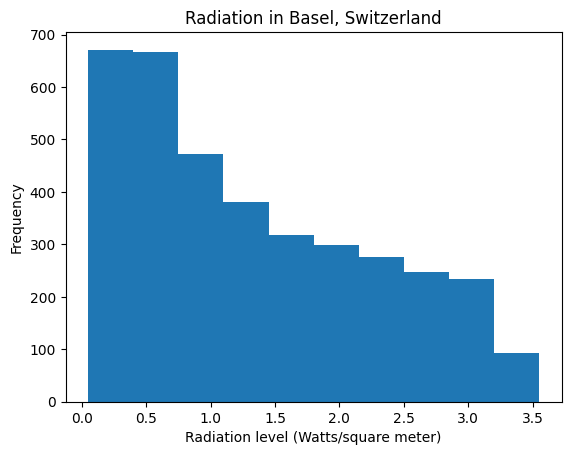

In [58]:
# Sonnblick radiation levels seem higher than the others, compare it to one of the other locations to check distribution
plt.hist(df_global_radiation['BASEL_global_radiation'])
plt.title("Radiation in Basel, Switzerland")
plt.xlabel("Radiation level (Watts/square meter)")
plt.ylabel("Frequency")
plt.show()

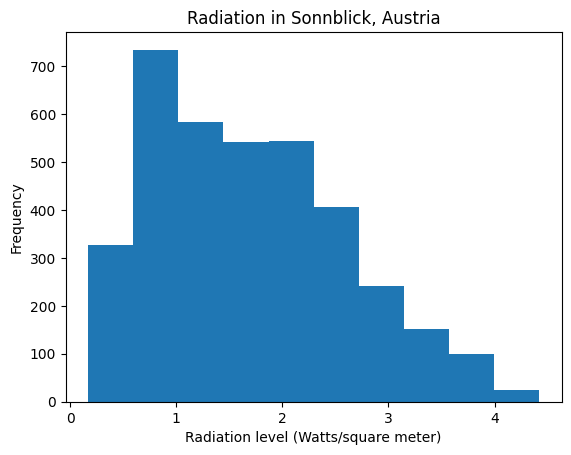

In [59]:
plt.hist(df_global_radiation['SONNBLICK_global_radiation'])
plt.title("Radiation in Sonnblick, Austria")
plt.xlabel("Radiation level (Watts/square meter)")
plt.ylabel("Frequency")
plt.show()

In [60]:
# Distribution does not seem implausible
# NoteL Sonnblick is an observatory on top of a Mountain in the Alps, the higher elevation can explain the increased radiation levels

### Precipitation

In [61]:
df_precipitation = measurements['precipitation']
print("Shape of precipitation dataset:", df_precipitation.shape)
df_precipitation

Shape of precipitation dataset: (3654, 19)


,DATE,MONTH,BASEL_precipitation,BUDAPEST_precipitation,DE_BILT_precipitation,DRESDEN_precipitation,DUSSELDORF_precipitation,HEATHROW_precipitation,KASSEL_precipitation,LJUBLJANA_precipitation,MAASTRICHT_precipitation,MALMO_precipitation,MONTELIMAR_precipitation,MUENCHEN_precipitation,OSLO_precipitation,PERPIGNAN_precipitation,SONNBLICK_precipitation,STOCKHOLM_precipitation,TOURS_precipitation
0,20000101,1,0.030,0.000,0.100,0.320,0.220,0.000,0.130,0.000,0.170,0.270,0.000,0.200,0.600,0.000,1.340,0.170,0.040
1,20000102,1,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.390,0.200,0.160
2,20000103,1,0.000,0.000,0.450,0.000,0.280,0.600,0.010,0.000,0.020,0.060,0.000,0.000,0.000,0.000,0.000,0.080,0.000
3,20000104,1,0.350,0.000,1.090,0.220,0.970,0.020,0.440,0.000,1.330,0.750,0.000,0.040,0.000,0.020,0.110,0.000,0.440
4,20000105,1,0.070,0.000,0.000,0.000,0.000,0.080,0.000,0.000,0.000,0.030,0.000,0.000,0.060,0.020,0.170,0.000,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.420,0.000,0.000,0.000,0.040,0.060,0.040,0.000,0.020,0.100,0.000,0.000,0.000,0.000,0.070,0.200,1.500
3650,20091229,12,1.680,0.320,0.550,0.310,1.570,1.280,1.250,0.020,1.070,0.000,0.160,0.440,0.000,0.040,0.080,0.000,0.400
3651,20091230,12,1.540,0.120,0.170,0.890,0.900,0.360,0.800,0.750,0.630,0.000,0.780,0.360,0.000,0.000,0.290,0.000,1.000
3652,20091231,12,0.570,0.690,0.000,0.240,0.040,0.000,0.850,1.380,0.160,0.000,0.660,0.350,0.020,0.060,0.170,0.180,0.020


In [62]:
print(df_precipitation.min(), df_precipitation.max())

DATE                       20000101.000
MONTH                             1.000
BASEL_precipitation               0.000
BUDAPEST_precipitation            0.000
DE_BILT_precipitation             0.000
DRESDEN_precipitation             0.000
DUSSELDORF_precipitation          0.000
HEATHROW_precipitation            0.000
KASSEL_precipitation              0.000
LJUBLJANA_precipitation           0.000
MAASTRICHT_precipitation          0.000
MALMO_precipitation               0.000
MONTELIMAR_precipitation          0.000
MUENCHEN_precipitation            0.000
OSLO_precipitation                0.000
PERPIGNAN_precipitation           0.000
SONNBLICK_precipitation           0.000
STOCKHOLM_precipitation           0.000
TOURS_precipitation               0.000
dtype: float64 DATE                       20100101.000
MONTH                            12.000
BASEL_precipitation               7.570
BUDAPEST_precipitation            6.960
DE_BILT_precipitation             4.250
DRESDEN_precipitation    

### Sunshine

In [63]:
df_sunshine = measurements['sunshine']
print("Shape of sunshine dataset:", df_sunshine.shape)
df_sunshine

Shape of sunshine dataset: (3654, 16)


,DATE,MONTH,BASEL_sunshine,BUDAPEST_sunshine,DE_BILT_sunshine,DRESDEN_sunshine,DUSSELDORF_sunshine,HEATHROW_sunshine,KASSEL_sunshine,LJUBLJANA_sunshine,MAASTRICHT_sunshine,MUENCHEN_sunshine,OSLO_sunshine,ROMA_sunshine,SONNBLICK_sunshine,STOCKHOLM_sunshine
0,20000101,1,0.000,3.700,0.000,0.000,0.000,0.400,0.000,5.200,0.000,0.000,0.000,8.400,0.000,0.000
1,20000102,1,0.000,0.400,0.000,0.400,0.700,0.700,2.900,5.000,0.000,6.100,1.600,6.500,2.800,0.000
2,20000103,1,3.700,0.000,0.000,0.000,0.000,0.000,0.000,2.400,0.900,0.400,0.000,0.000,5.100,1.800
3,20000104,1,6.900,0.000,0.000,0.000,0.000,2.900,0.000,3.500,0.000,4.500,5.300,8.200,8.700,5.000
4,20000105,1,3.700,0.800,6.500,5.700,6.500,1.300,6.700,4.600,6.200,0.200,0.000,7.500,3.400,2.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.300,6.100,5.200,0.000,0.000,3.700,1.100,0.900,0.000,3.800,4.800,0.000,5.900,0.000
3650,20091229,12,0.200,6.700,0.400,6.200,0.400,0.000,2.600,0.000,0.000,0.000,4.900,0.000,2.700,0.000
3651,20091230,12,0.000,0.000,0.000,0.000,0.000,0.000,0.400,0.000,0.000,0.000,4.400,1.900,1.000,0.000
3652,20091231,12,0.100,0.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.700,4.300,1.400,0.100


In [64]:
print(df_sunshine.min(), df_sunshine.max())

DATE                  20000101.000
MONTH                        1.000
BASEL_sunshine               0.000
BUDAPEST_sunshine            0.000
DE_BILT_sunshine             0.000
DRESDEN_sunshine             0.000
DUSSELDORF_sunshine          0.000
HEATHROW_sunshine            0.000
KASSEL_sunshine              0.000
LJUBLJANA_sunshine           0.000
MAASTRICHT_sunshine          0.000
MUENCHEN_sunshine            0.000
OSLO_sunshine                0.000
ROMA_sunshine                0.000
SONNBLICK_sunshine           0.000
STOCKHOLM_sunshine          -1.700
dtype: float64 DATE                  20100101.000
MONTH                       12.000
BASEL_sunshine              15.300
BUDAPEST_sunshine           14.900
DE_BILT_sunshine            15.500
DRESDEN_sunshine            15.800
DUSSELDORF_sunshine         16.000
HEATHROW_sunshine           15.500
KASSEL_sunshine             15.000
LJUBLJANA_sunshine          15.000
MAASTRICHT_sunshine         15.200
MUENCHEN_sunshine           15.700
OSLO_

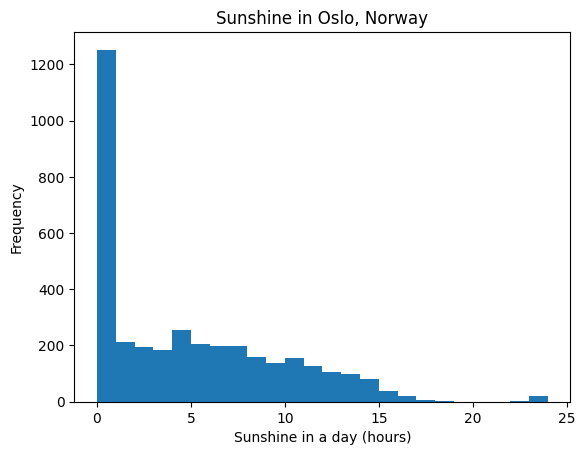

In [65]:
# Once again, Stockholm has negative sunshine levels
# Sunshine is measured in hours per day, thus 0-24 range, cannot be negative
# Compare it to one of the other locations to check distribution
plt.hist(df_sunshine['OSLO_sunshine'], bins=24)
plt.title("Sunshine in Oslo, Norway")
plt.xlabel("Sunshine in a day (hours)")
plt.ylabel("Frequency")
plt.show()

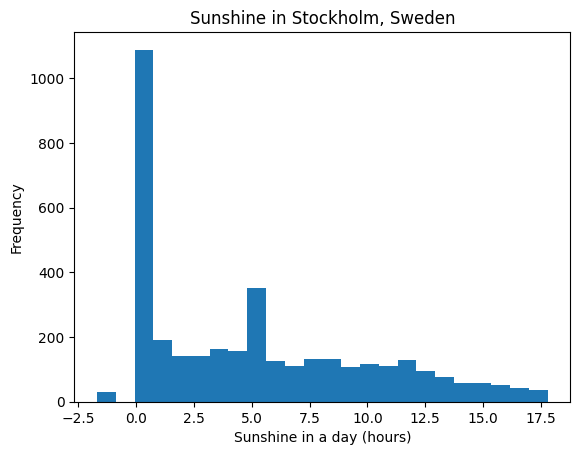

In [66]:
plt.hist(df_sunshine['STOCKHOLM_sunshine'], bins=24)
plt.title("Sunshine in Stockholm, Sweden")
plt.xlabel("Sunshine in a day (hours)")
plt.ylabel("Frequency")
plt.show()

In [69]:
# Remember to also apply the following change to the general weather dataset
df_sunshine['STOCKHOLM_sunshine'] = np.clip(df_sunshine['STOCKHOLM_sunshine'], a_min=0.0, a_max=None)
print(df_sunshine.min(), df_sunshine.max())

DATE                  20000101.000
MONTH                        1.000
BASEL_sunshine               0.000
BUDAPEST_sunshine            0.000
DE_BILT_sunshine             0.000
DRESDEN_sunshine             0.000
DUSSELDORF_sunshine          0.000
HEATHROW_sunshine            0.000
KASSEL_sunshine              0.000
LJUBLJANA_sunshine           0.000
MAASTRICHT_sunshine          0.000
MUENCHEN_sunshine            0.000
OSLO_sunshine                0.000
ROMA_sunshine                0.000
SONNBLICK_sunshine           0.000
STOCKHOLM_sunshine           0.000
dtype: float64 DATE                  20100101.000
MONTH                       12.000
BASEL_sunshine              15.300
BUDAPEST_sunshine           14.900
DE_BILT_sunshine            15.500
DRESDEN_sunshine            15.800
DUSSELDORF_sunshine         16.000
HEATHROW_sunshine           15.500
KASSEL_sunshine             15.000
LJUBLJANA_sunshine          15.000
MAASTRICHT_sunshine         15.200
MUENCHEN_sunshine           15.700
OSLO_

C:\Users\tanks\AppData\Local\Temp\ipykernel_17740\2433253860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sunshine['STOCKHOLM_sunshine'] = np.clip(df_sunshine['STOCKHOLM_sunshine'], a_min=0.0, a_max=None)


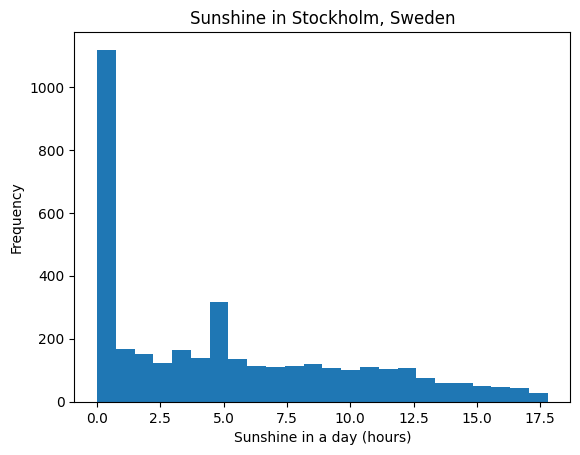

In [70]:
plt.hist(df_sunshine['STOCKHOLM_sunshine'], bins=24)
plt.title("Sunshine in Stockholm, Sweden")
plt.xlabel("Sunshine in a day (hours)")
plt.ylabel("Frequency")
plt.show()

In [71]:
# Now apply the fixes to the entire dataset

# For Stockholm cloud cover
weather_dataset['STOCKHOLM_cloud_cover'] = np.where((weather_dataset['STOCKHOLM_cloud_cover'] < 0), 0, weather_dataset['STOCKHOLM_cloud_cover'])

# For Stockholm pressure
# For Tours pressure
weather_dataset['STOCKHOLM_pressure'] = np.clip(weather_dataset['STOCKHOLM_pressure'], a_min=stockholm_min, a_max=None)
weather_dataset['TOURS_pressure'] = np.clip(weather_dataset['TOURS_pressure'], a_min=tours_min, a_max=None)

# For Stockholm sunshine
weather_dataset['STOCKHOLM_sunshine'] = np.clip(weather_dataset['STOCKHOLM_sunshine'], a_min=0.0, a_max=None)

In [73]:
# Check the weather dataset
print(weather_dataset['STOCKHOLM_cloud_cover'].sort_values(ascending=True))
print(weather_dataset['STOCKHOLM_pressure'].sort_values(ascending=True))
print(weather_dataset['TOURS_pressure'].sort_values(ascending=True))
print(weather_dataset['STOCKHOLM_sunshine'].sort_values(ascending=True))

921     0
1767    0
2710    0
2712    0
406     0
       ..
2746    8
2771    8
3606    8
2810    8
1407    9
Name: STOCKHOLM_cloud_cover, Length: 3654, dtype: int64
2710   0.969
23     0.969
784    0.969
2837   0.969
2634   0.971
        ... 
1407   1.044
2213   1.045
1072   1.048
1070   1.048
1071   1.051
Name: STOCKHOLM_pressure, Length: 3654, dtype: float64
3286   0.976
310    0.976
1399   0.981
3645   0.985
311    0.985
        ... 
1119   1.038
2947   1.039
1829   1.039
2625   1.039
2946   1.041
Name: TOURS_pressure, Length: 3654, dtype: float64
3640    0.000
3635    0.000
3631    0.000
3630    0.000
3629    0.000
        ...  
550    17.700
2011   17.700
549    17.800
2372   17.800
2373   17.800
Name: STOCKHOLM_sunshine, Length: 3654, dtype: float64


In [74]:
from library.sb_utils import save_file

In [75]:
# save the data to a new csv file
datapath = 'modified_data'
save_file(weather_dataset, 'weather_prediction_dataset_cleaned.csv', datapath)

Writing file.  "modified_data\weather_prediction_dataset_cleaned.csv"


In [ ]:
# multi-label prediction strategy
# Or a separate model for each of the 3 temp values